In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Горбатая яма
Сегодня мы рисуем уровни энергии я потенциальной яме из двух бесконечных стенок и небольшого горба между ними

<IPython.core.display.Javascript object>


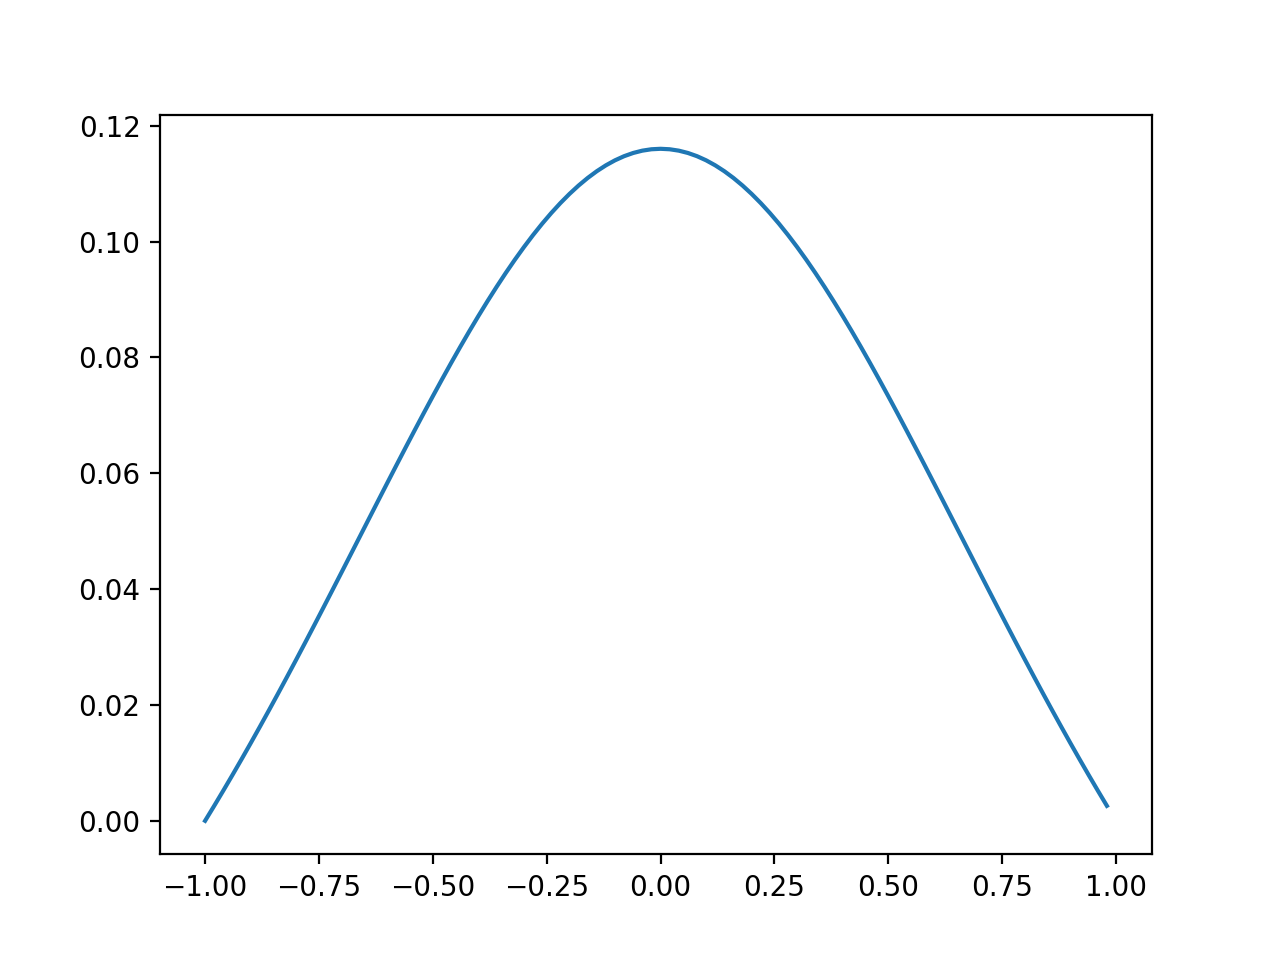

In [13]:
x = [i*h/2 for i in range(-N, N, 2)]
g = (1/(np.cosh(x)**2) - 1/(np.cosh(a)**2))

plt.figure()
plt.plot(x, 0.2*g, label = 'H = 0.2')

^ вот так выглядит тот самый горб

Из-за него в матрице возникает добавка к диагональным элементам:

In [6]:
N = 100
a = 1
h = 2*a/N


#g1 = [- (x**2 - a**2) for x in x]
def gg(H):
    
    M = np.zeros((N,N))
    for i in range(1, N-1):
        M[i,i-1] = M[i, i+1] = 1
        M[i,i] = -2 + H * (1/(np.cosh(i)**2) - 1/(np.cosh(a)**2)) * (h**2)

    #print(M)
    w, v = np.linalg.eig(M)
    E = - w
    E = np.sort(E)

    return np.sqrt(E)

Всё готово, теперь построим график зависимости энегрии* от уровня, ожидается парабола, так что засунем энергию под корень и будем надеяться на линейную зависимость

*Нас не особо волнуют значения, куда важнее сам вид зависимости, так что все константы типа массы и постоянной планка мы полагаем равными единице

<IPython.core.display.Javascript object>


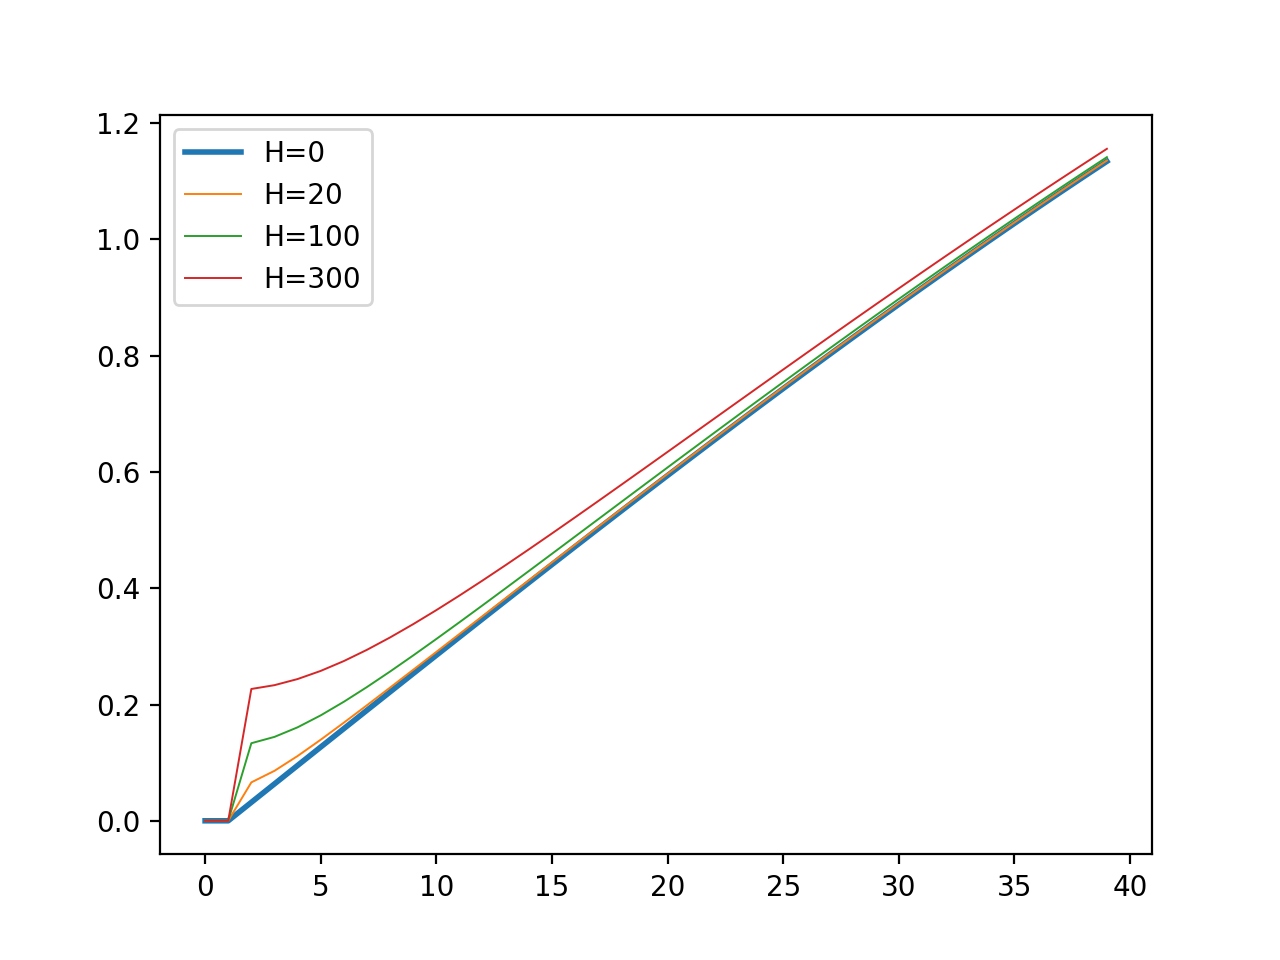

In [15]:
%matplotlib notebook
n = [i for i in range(N)]

#plt.xscale('log')
#plt.yscale('log')



plt.figure()
plt.plot(n[:40], gg(0)[:40], label='H=0', linewidth = 2)
plt.plot(n[:40], gg(20)[:40], label='H=20', linewidth = 0.7)
plt.plot(n[:40], gg(100)[:40], label='H=100', linewidth = 0.7)
plt.plot(n[:40], gg(300)[:40], label='H=300', linewidth = 0.7)
plt.legend()

получилось вот что, на малых значениях n всё линейно(у ямки без горки), чему мы, конечно, рады

что касается измененных ям, грфики довольно сильно отличаются даже при малой высоте горки